In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")

In [4]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)
df['genre'] = pd.factorize(df['genre'])[0]
y = np.array(df["genre"])
df = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
X = df.values

In [5]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_minmax)

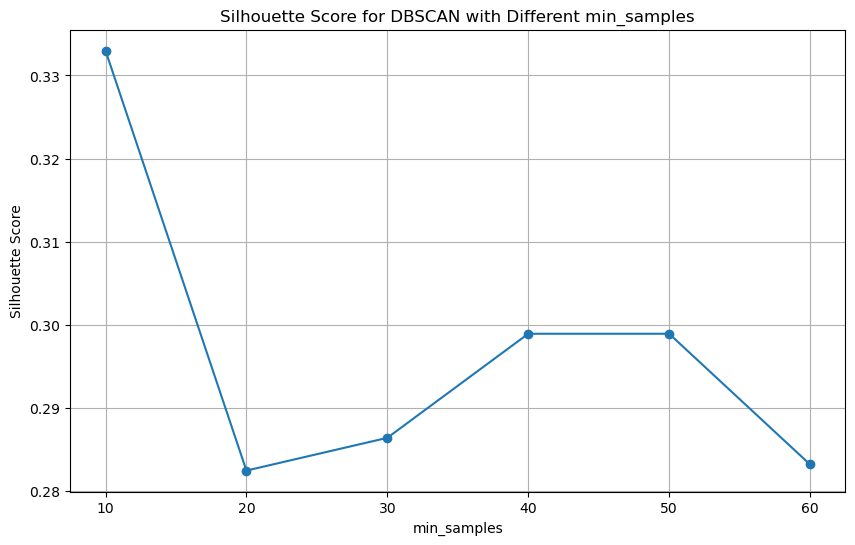

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Replace this with your actual `X_pca` dataset
# X_pca = ... # Your dataset should be loaded or defined here

# List to store the silhouette scores for different min_samples values
silhouette_scores = []
min_samples_list = range(10, 70, 10)  # min_samples values from 10 to 60

# Calculate silhouette score for different values of min_samples
for min_samples in min_samples_list:
    # Initialize DBSCAN with the current min_samples
    dbscan = DBSCAN(eps= 0.4, min_samples=min_samples)
    # Fit the model
    clusters = dbscan.fit_predict(X_pca)
    
    # Silhouette score can only be computed if there are 2 or more clusters (excluding noise)
    if len(set(clusters)) - (1 if -1 in clusters else 0) > 1:
        score = silhouette_score(X_pca, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_list, silhouette_scores, marker='o')
plt.title('Silhouette Score for DBSCAN with Different min_samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


# DBSCAN

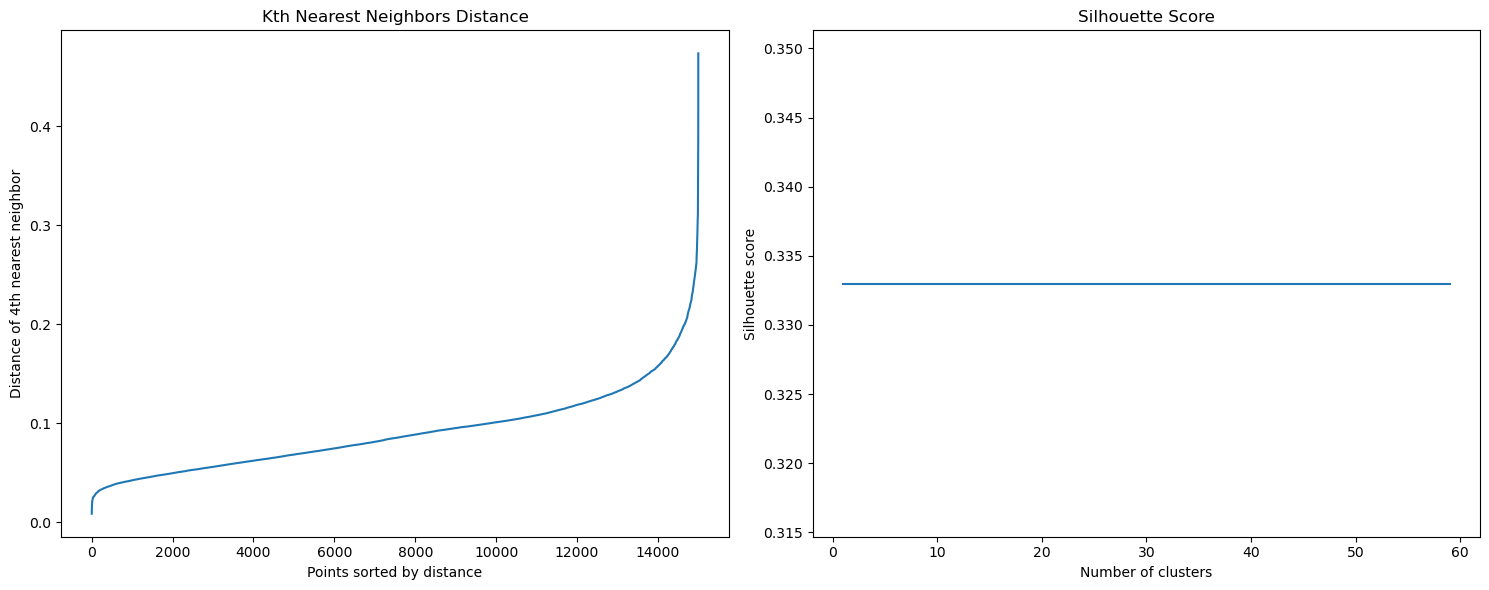

In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Kth Nearest Neighbor calculation
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

# Sort the distances
sorted_distances = np.sort(distances, axis=0)
sorted_distances = sorted_distances[:, k-1]

# Silhouette analysis
range_n_clusters = list(range(1, 60))  # example range, adjust based on your needs
silhouette_avg = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value
    clusterer = DBSCAN(eps=0.5, min_samples=n_clusters).fit(X_pca)
    cluster_labels = clusterer.labels_
    
    # Filter out noise points for silhouette calculation
    filtered_labels = cluster_labels[cluster_labels != -1]
    filtered_X_pca = X_pca[cluster_labels != -1]
    
    # The silhouette_score gives the average value for all the samples.
    if len(set(filtered_labels)) > 1:  # There must be at least 2 clusters
        score = silhouette_score(filtered_X_pca, filtered_labels)
        silhouette_avg.append(score)
    else:
        silhouette_avg.append(-1)  # Indicate an invalid score when there are no clusters or only one cluster


# Plotting both graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Kth Nearest Neighbors plot
ax1.plot(np.arange(len(sorted_distances)), sorted_distances)
ax1.set_title('Kth Nearest Neighbors Distance')
ax1.set_xlabel('Points sorted by distance')
ax1.set_ylabel(f'Distance of {k}th nearest neighbor')


plt.tight_layout()
plt.show()


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Define the range of values for eps and min_samples that you want to test
eps_values = np.arange(0.19, 0.2, 0.05)  # Adjust this range as needed
min_samples_values = range(2, 100)  # Adjust this range as needed

# Initialize best score and parameters
best_score = -1
best_eps = None
best_min_samples = None

# Grid search
for eps in tqdm(eps_values):
    for min_samples in min_samples_values:
        # DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(X_pca)
        
        # Silhouette score is only valid if there are more than one cluster and less than n-1 clusters
        if len(set(cluster_labels)) > 1 and len(set(cluster_labels)) < len(X_pca) - 1:
            score = silhouette_score(X_pca, cluster_labels)
            
            # Keep track of the best score and corresponding parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Output the best parameters and corresponding score
print(f"Best silhouette score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")


100%|██████████| 1/1 [02:58<00:00, 178.88s/it]

Best silhouette score: 0.2499530552860637
Best eps: 0.19
Best min_samples: 35


In [23]:
dbscan = DBSCAN(eps=0.05, min_samples=6)
dbscan.fit(X_pca)

print('Silhouette', silhouette_score(X_pca, dbscan.labels_))

Silhouette -0.6314432930999037


### kth neighbor distance

In [7]:
dist = pdist(X_pca, 'euclidean')
dist = squareform(dist)

# sns.heatmap(dist, cmap="Greens_r", annot=False)
# plt.show()

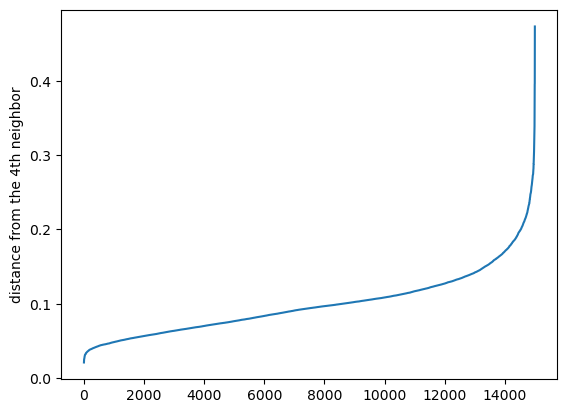

In [8]:
k=4
kth_distances = []
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance]) 

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

### Min samples vs silhouette

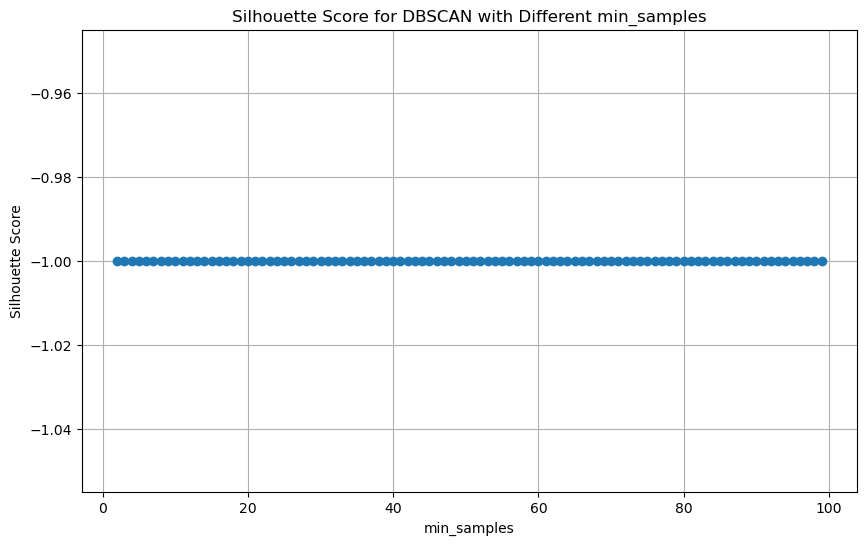

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Supponiamo che X_pca sia già definito e contenga i tuoi dati PCA-trasformati.

# Definisci un intervallo di valori per min_samples
min_samples_values = range(2, 100)  # Ad esempio, da 2 a 99

# Inizializza una lista per memorizzare i punteggi silhouette
silhouette_scores = []

# Esegui DBSCAN con diversi valori di min_samples e calcola il punteggio silhouette
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.05, min_samples=min_samples)
    dbscan.fit(X_pca)
    
    # Assicurati che ci sia più di un cluster identificato (escluso il rumore) prima di calcolare il punteggio
    if len(set(dbscan.labels_)) > 1 and -1 not in set(dbscan.labels_):
        score = silhouette_score(X_pca, dbscan.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Un valore non valido se non ci sono cluster validi

# Grafico dei punteggi silhouette per diversi valori di min_samples
plt.figure(figsize=(10, 6))
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for DBSCAN with Different min_samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## Grid search

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Definisci lo spazio dei parametri per Grid Search
param_grid = {
    'eps': np.linspace(0.01, 0.15, 15),  # Aggiusta questi valori in base al tuo caso d'uso
    'min_samples': range(2, 15)  # Aggiusta anche questi valori
}

# Inizializza le variabili per tenere traccia del miglior punteggio e dei migliori parametri
best_score = -1
best_params = None

# Esegui Grid Search
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan.fit(X_pca)
    
    # Non calcolare il punteggio silhouette se tutti i punti sono etichettati come rumore
    if len(set(dbscan.labels_)) > 1:
        score = silhouette_score(X_pca, dbscan.labels_)
        # print(f"EPS: {params['eps']}, min_samples: {params['min_samples']}, silhouette: {score}")
        
        if score > best_score:
            best_score = score
            best_params = params

# Stampa i migliori parametri e il miglior punteggio
print(f"Best silhouette score: {best_score}")
print(f"Best parameters: {best_params}")


Best silhouette score: 0.25454829315839406
Best parameters: {'eps': 0.01, 'min_samples': 4}


# OPTICS

In [11]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [12]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Definisci lo spazio dei parametri per Grid Search
param_grid = {
    'min_samples': range(2, 15),  # esplora da 2 a 99
    'xi': np.linspace(0.01, 0.15, 15),  # esplora potenziali valori di xi
    'max_eps': [np.inf],  # puoi aggiungere altri valori se necessario
    'cluster_method': ['xi', 'dbscan'],  # esplora i due metodi di clustering
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # esplora diverse metriche di distanza
}

# Inizializza le variabili per tenere traccia del miglior punteggio e dei migliori parametri
best_score = -1
best_params = None

# Esegui Grid Search
for params in ParameterGrid(param_grid):
    optics = OPTICS(min_samples=params['min_samples'], 
                    xi=params['xi'], 
                    max_eps=params['max_eps'], 
                    metric=params['metric'],
                    cluster_method=params['cluster_method'])
    optics.fit(X_pca)
    
    # Calcola il punteggio silhouette se esistono cluster significativi
    labels = optics.labels_
    if len(set(labels)) > 1 and np.any(labels != -1):
        score = silhouette_score(X_pca, labels)
        # print(f"min_samples: {params['min_samples']}, xi: {params['xi']}, silhouette: {score}")
        
        if score > best_score:
            best_score = score
            best_params = params

# Stampa i migliori parametri e il miglior punteggio
print(f"Best silhouette score: {best_score}")
print(f"Best parameters: {best_params}")


/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / re

KeyboardInterrupt: 

In [ ]:
optics = OPTICS(min_samples = 5, max_eps = np.inf, min_cluster_size=40)
optics.fit(X_pca)